To demonstrate the ``CPPPlot().profile()`` method, we first load the example ``DOM_GSEC`` dataset and its respective features (see [Breimann25a]_):

In [1]:
import matplotlib.pyplot as plt
import aaanalysis as aa
aa.options["verbose"] = False

df_seq = aa.load_dataset(name="DOM_GSEC")
df_feat = aa.load_features(name="DOM_GSEC")
df_feat = df_feat.sort_values(by="feat_importance", ascending=False).reset_index(drop=True)
aa.display_df(df_feat, show_shape=True, n_rows=7)

DataFrame shape: (150, 15)


,feature,category,subcategory,scale_name,scale_description,abs_auc,abs_mean_dif,mean_dif,std_test,std_ref,p_val_mann_whitney,p_val_fdr_bh,positions,feat_importance,feat_importance_std
1,"TMD_C_JMD_C-Seg...,11)-LIFS790102",Conformation,β-strand,β-strand,"Conformational ...n-Sander, 1979)",0.189000,0.125674,0.125674,0.183876,0.218813,0.000001,0.000039,"28,29",4.729200,4.776785
2,"TMD_C_JMD_C-Seg...2,3)-CHOP780212",Conformation,β-sheet (C-term),β-turn (1st residue),"Frequency of th...-Fasman, 1978b)",0.199000,0.065983,-0.065983,0.087814,0.105835,0.000000,0.000016,"27,28,29,30,31,32,33",4.106000,5.236574
3,"TMD_C_JMD_C-Seg...3,4)-HUTJ700102",Energy,Entropy,Entropy,"Absolute entrop...Hutchens, 1970)",0.229000,0.098224,0.098224,0.106865,0.124608,0.000000,0.000001,"31,32,33,34,35",3.111200,3.109955
4,"TMD_C_JMD_C-Seg...2,3)-AURR980110",Conformation,α-helix,α-helix (middle),"Normalized posi...ora-Rose, 1998)",0.211000,0.077355,0.077355,0.102965,0.107453,0.000000,0.000005,"27,28,29,30,31,32,33",3.048800,3.623912
5,"TMD_C_JMD_C-Pat...4,8)-JANJ790102",Energy,Free energy (unfolding),Transfer free e...(TFE) to inside,"Transfer free e...y (Janin, 1979)",0.187000,0.144354,-0.144354,0.181777,0.233103,0.000001,0.000049,"33,37",2.833600,3.640617
6,"TMD_C_JMD_C-Pat...4,8)-KANM800103",Conformation,α-helix,α-helix,"Average relativ...sa-Tsong, 1980)",0.176000,0.087846,0.087846,0.140464,0.157561,0.000004,0.000113,"24,28",2.704000,4.076269
7,"TMD_C_JMD_C-Pat...,10)-LEVM760105",Shape,Side chain length,Side chain length,"Radius of gyrat... (Levitt, 1976)",0.149000,0.073526,0.073526,0.133612,0.157088,0.000090,0.000714,"31,34,38",2.050800,2.338278


**CPP Analysis**

The group-level feature impact per residue position can be visualized by providing the ``df_feat`` DataFrame:

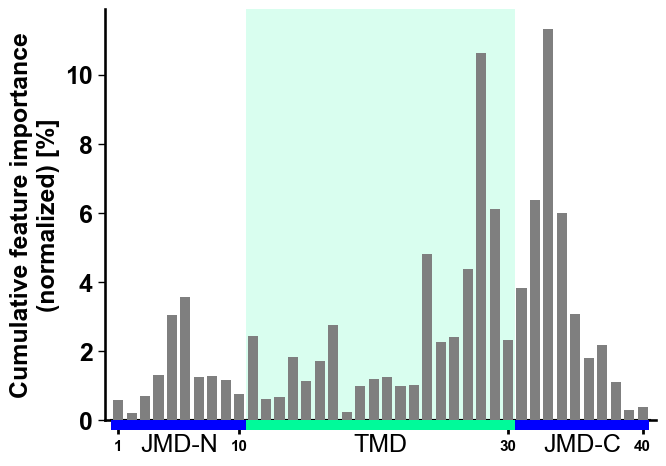

In [2]:
# Plot CPP profile at group-level
cpp_plot = aa.CPPPlot()
aa.plot_settings()
cpp_plot.profile(df_feat=df_feat)
plt.show()

You can show the number of features per residue position instead of the feature importance by setting ``col_imp=None`` (default='feat_importance'):

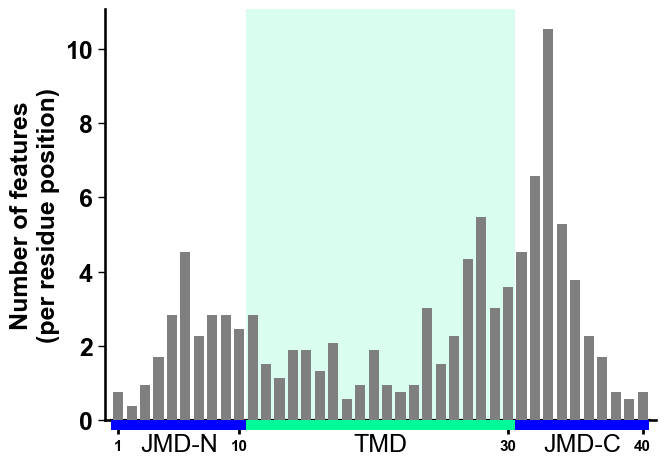

In [3]:
# Show number of features per position
cpp_plot.profile(df_feat=df_feat, col_imp=None)
plt.show()

The feature importance displayed is normalized by default, meaning that all values sum up to a total of 100%. You can turn off this normalization by setting ``normalize=False`` (default='True'), useful when showing a feature subset. We set a similar ``ylim`` to keep the results comparable:

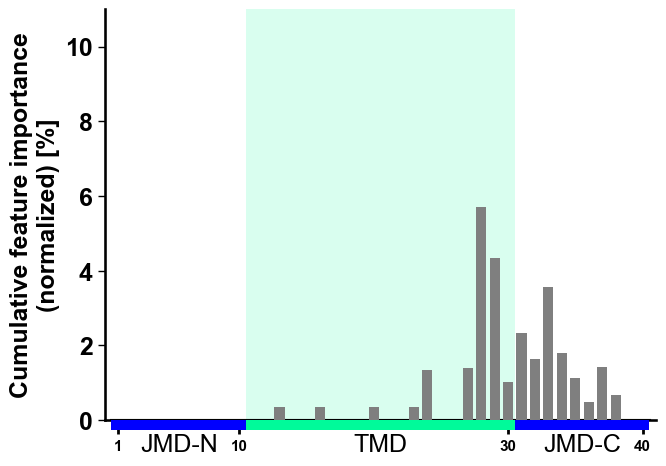

In [4]:
# Show top 10 features
df_top10 = df_feat.head(10)
cpp_plot.profile(df_feat=df_top10, normalize=False, ylim=(0, 11))
plt.show()

You can adjust the ``figsize`` (default=(7, 5)), ``start`` (default=1) position, and ``tmd_len`` (default=20) as follows:

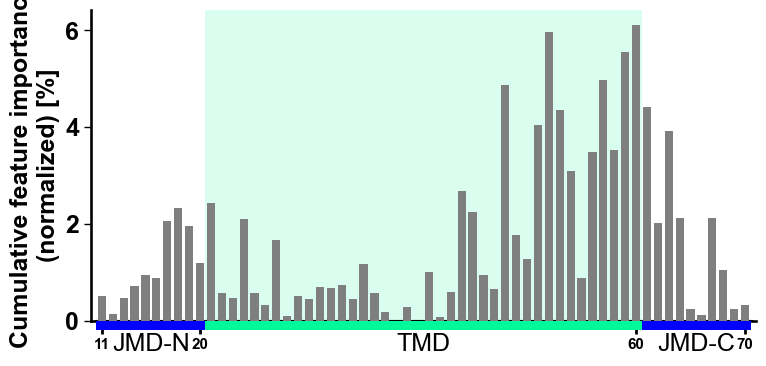

In [5]:
# Increase width of figure, start at 11 position and double tmd length 
cpp_plot.profile(df_feat=df_feat, figsize=(8, 4), start=11, tmd_len=40)
plt.show()

**CPP Analysis (sample-level)**

You can visualize how the general feature importance is translated onto the sequence of a specific sample. To this end, you need to provide the corresponding sequence parameters: ``jmd_n_seq``, ``tmd_seq``, and ``jmd_c_seq``:

Sequence parts of first sample
FAEDVGSNKG AIIGLMVGGVVIATVIVITLVML KKKQYTSIHH


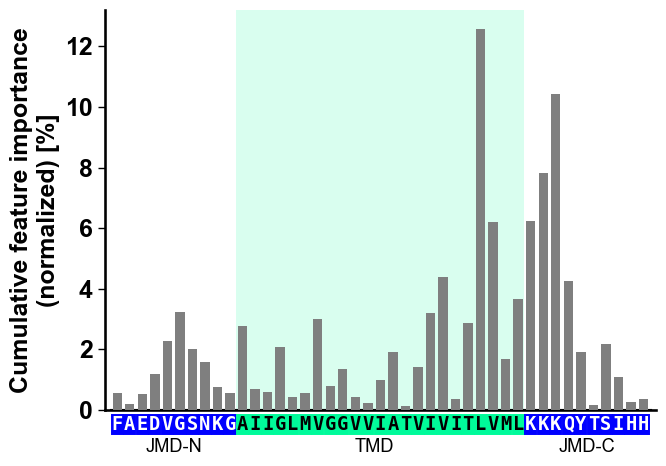

In [6]:
# Get sequence parts of first sample
jmd_n_seq, tmd_seq, jmd_c_seq = df_seq.loc[0, ["jmd_n", "tmd", "jmd_c"]]
args_seq = dict(jmd_n_seq=jmd_n_seq, tmd_seq=tmd_seq, jmd_c_seq=jmd_c_seq)
print("Sequence parts of first sample")
print(jmd_n_seq, tmd_seq, jmd_c_seq)

# Plot CPP profile for first sample
cpp_plot.profile(df_feat=df_feat, **args_seq)
plt.show()

You can customize the following color parameters: ``tmd_color`` (default='mediumspringgreen'), ``jmd_color`` (default='blue'), ``tmd_seq_color`` (default='black'), and ``jmd_seq_color`` (default='white'):

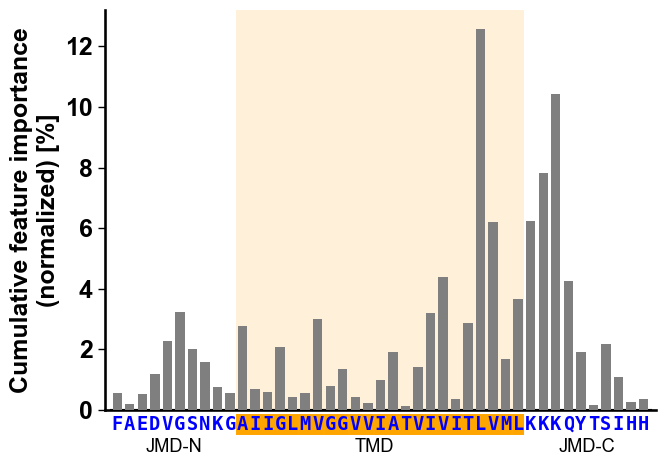

In [7]:
# Change default TMD-JMD colors
cpp_plot.profile(df_feat=df_feat, **args_seq, tmd_color="orange", jmd_color="white", tmd_seq_color="blue", jmd_seq_color="blue")
plt.show()

The fontsize of the sequence is optimized automatically. Set ``verbose=True`` to see the optimized size. You can set it manually using the ``seq_size`` parameter:

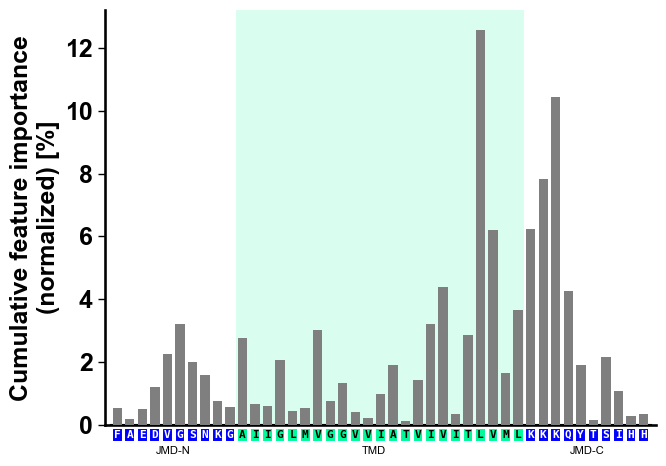

In [8]:
# Change sequence size manually
cpp_plot.profile(df_feat=df_feat, **args_seq, seq_size=8)
plt.show()

However, this can lead to lead to non-optimal spacing between the sequence characters. Adjust the font size of the part labels ('JMD-N', 'TMD', 'JMD-C') by setting ``fontsize_tmd_jmd``, which is by default set to the optimized sequence size:

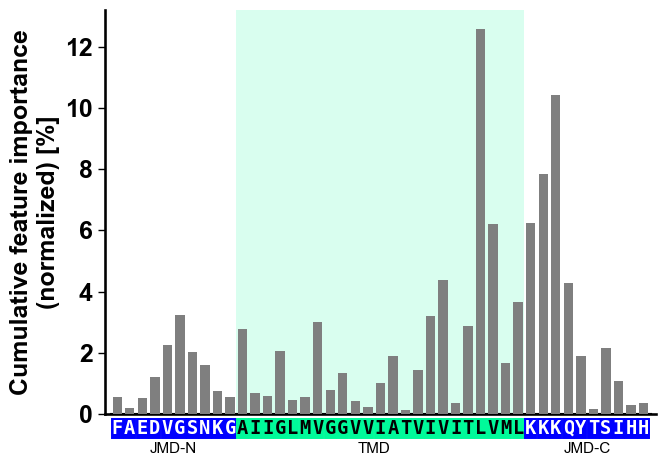

In [9]:
cpp_plot.profile(df_feat=df_feat, **args_seq, fontsize_tmd_jmd=11)
plt.show()

The part labels can only be changed globally using ``options`` as follows:

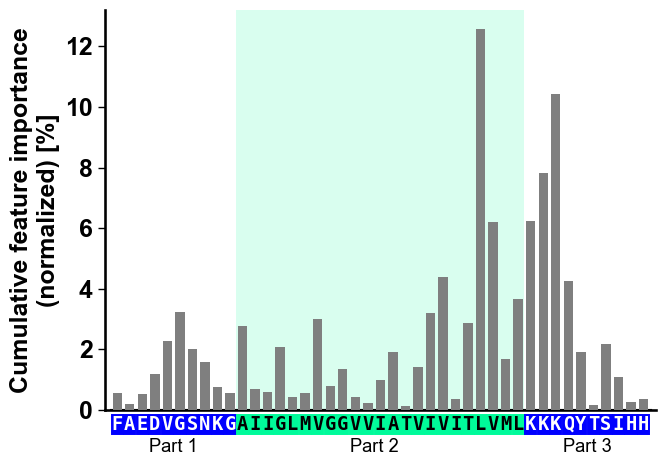

In [10]:
# Adjust part names globally
aa.options["name_jmd_n"] = "Part 1"
aa.options["name_tmd"] = "Part 2"
aa.options["name_jmd_c"] = "Part 3"

cpp_plot.profile(df_feat=df_feat, **args_seq)
plt.show()

You can focus on only the Target Middle Domain (TMD) by setting the size of the JMDs to 0. Disable the highlight of the TMD by setting ``highlight_tmd_area=False`` (default=True):

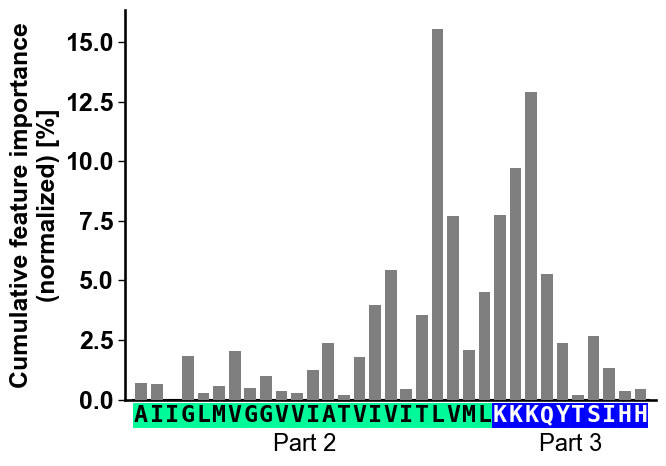

In [11]:
# Show only features from TMD and JMD-N
cpp_plot = aa.CPPPlot(jmd_n_len=0, jmd_c_len=10)
mask = ~df_feat["feature"].str.contains("JMD_N")
cpp_plot.profile(df_feat=df_feat[mask], tmd_seq=tmd_seq, jmd_c_seq=jmd_c_seq, highlight_tmd_area=False)
plt.show()

Display the xtick positions in addition to the sequence by setting ``add_xticks_pos=True`` (default=False):

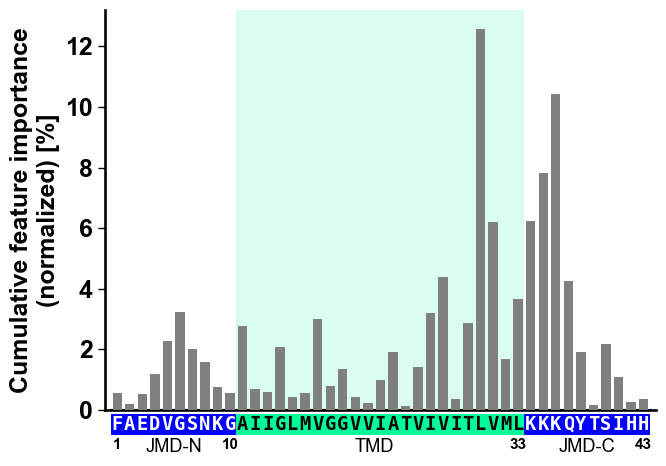

In [12]:
# Set parts back to default
aa.options["name_jmd_n"] = "JMD-N"
aa.options["name_tmd"] = "TMD"
aa.options["name_jmd_c"] = "JMD-C"
cpp_plot = aa.CPPPlot()

cpp_plot.profile(df_feat=df_feat, **args_seq, add_xticks_pos=True)
plt.show()

Change the transparency of the TMD highlighting area using the ``highlight_alpha`` (default=0.15) parameter: 

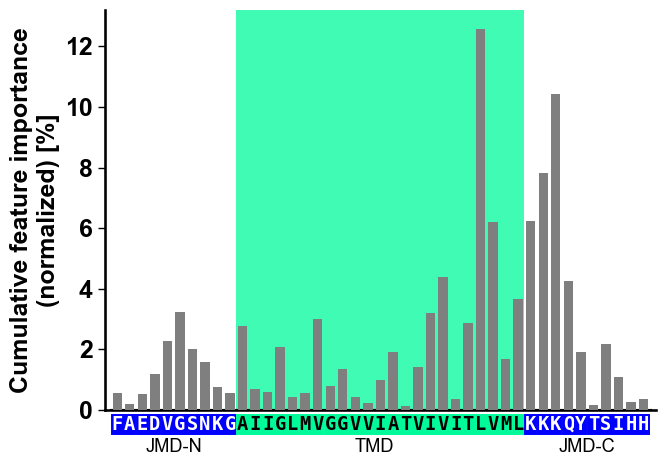

In [13]:
# Change transparency of TMD area
cpp_plot.profile(df_feat=df_feat, **args_seq, highlight_alpha=0.75)
plt.show()

**CPP Analysis**

You can represent the scale category for each feature at each residue position as a stacked bar chart. To do this, set ``add_legend_cat``, which also automatically includes the corresponding legend:

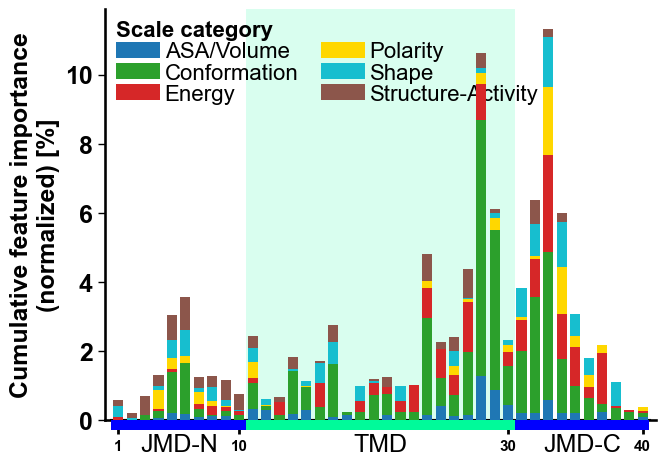

In [14]:
# Add scale classification
cpp_plot.profile(df_feat=df_feat, add_legend_cat=True)
plt.show()

Adjust the legend by the ``legend_kws`` parameter:

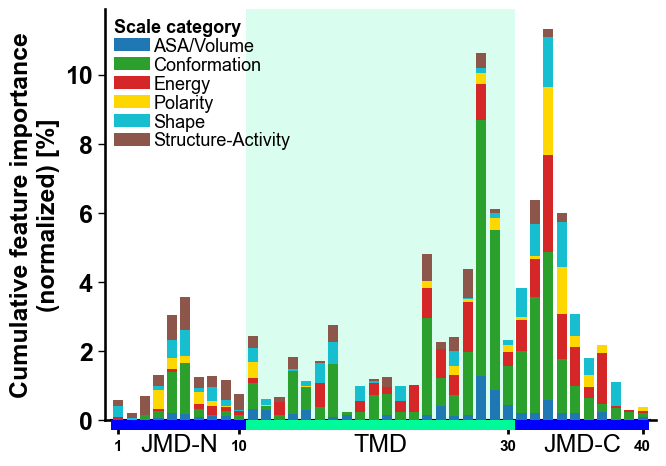

In [15]:
# Adjust legend, colors can be changed by 'dict_color' 
legend_kws = dict(n_cols=1, fontsize=13, fontsize_title=13)
cpp_plot.profile(df_feat=df_feat, add_legend_cat=True, legend_kws=legend_kws)
plt.show()

Adjust the ``bar_width`` (default=0.75) and the bar ``edge_color`` (dfault=None) as follows:

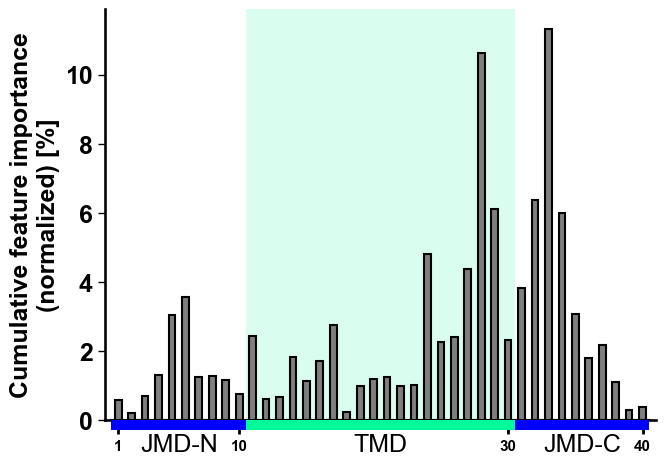

In [16]:
# Make edges black
cpp_plot.profile(df_feat=df_feat, bar_width=0.5, edge_color="black")
plt.show()

Show ``grid_axis`` (default=None, disabled) and set ``ylim``, as exemplified here:

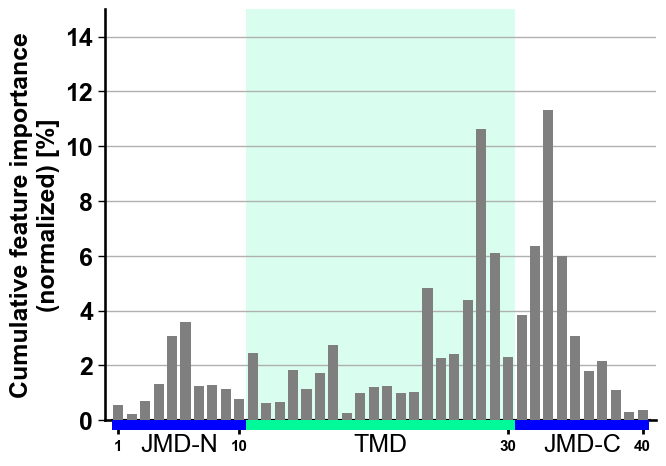

In [17]:
# Adjust ylim
cpp_plot.profile(df_feat=df_feat, grid_axis="y", ylim=(0, 15))
plt.show()

Following x-tick parameters can be adjusted: ``xtick_size`` (default=11.0), ``xtick_width`` (default=2.0), ``xtick_length`` (default=5.0):

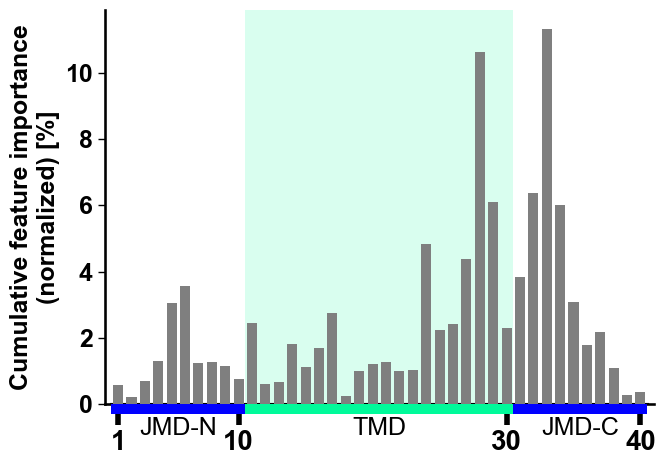

In [18]:
# Adjust x-ticks
cpp_plot.profile(df_feat=df_feat, xtick_size=20, xtick_width=4, xtick_length=10)
plt.show()

Or the following y-tick parameters: ``ytick_size`` (adheres to global settings), ``ytick_width`` (default=2.0), and ``ytick_length`` (default=5.0):

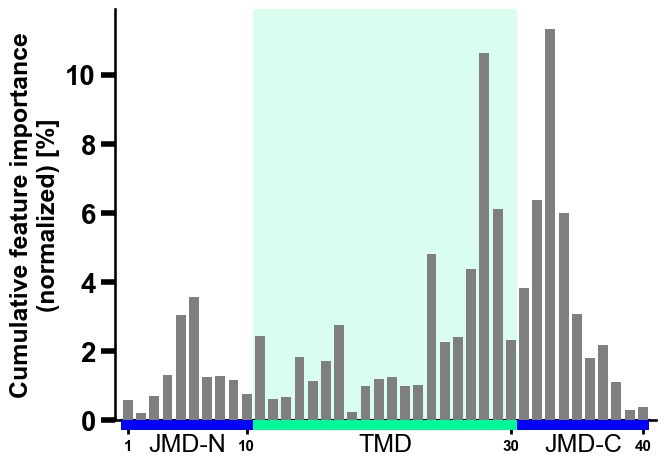

In [19]:
# Modify y-ticks
cpp_plot.profile(df_feat=df_feat, ytick_size=20, ytick_width=4, ytick_length=10)
plt.show()

**CPP-SHAP analysis**

Set ``shap_plot=True`` for visualizing the sample-specific feature impact instead of the overall feature importance. To demonstrate this, we create the feature matrix for the DOM_GSEC example dataset (see [Breimann25a]_) using the ``SequenceFeature().feature_matrix()`` method:

In [20]:
# Create feature matrix
sf = aa.SequenceFeature()
df_parts = sf.get_df_parts(df_seq=df_seq)
X = sf.feature_matrix(features=df_feat["feature"], df_parts=df_parts)

Next, we must include the feature impact into the ``df_feat`` for all samples using the ``ShapExplainer`` model:

In [21]:
labels = df_seq["label"].to_list()

# Fit SHAP explainer to obtain SHAP values
se = aa.ShapExplainer()
se.fit(X, labels=labels)

# Include feature impact for all samples
df_feat = se.add_feat_impact(df_feat=df_feat, drop=True)
aa.display_df(df_feat, n_rows=5, n_cols=15)

,feature,category,subcategory,scale_name,scale_description,abs_auc,abs_mean_dif,mean_dif,std_test,std_ref,p_val_mann_whitney,p_val_fdr_bh,positions,feat_impact_Protein0,feat_impact_Protein1
1,"TMD_C_JMD_C-Seg...,11)-LIFS790102",Conformation,β-strand,β-strand,"Conformational ...n-Sander, 1979)",0.189000,0.125674,0.125674,0.183876,0.218813,0.000001,0.000039,"28,29",2.730000,2.950000
2,"TMD_C_JMD_C-Seg...2,3)-CHOP780212",Conformation,β-sheet (C-term),β-turn (1st residue),"Frequency of th...-Fasman, 1978b)",0.199000,0.065983,-0.065983,0.087814,0.105835,0.000000,0.000016,"27,28,29,30,31,32,33",3.930000,3.900000
3,"TMD_C_JMD_C-Seg...3,4)-HUTJ700102",Energy,Entropy,Entropy,"Absolute entrop...Hutchens, 1970)",0.229000,0.098224,0.098224,0.106865,0.124608,0.000000,0.000001,"31,32,33,34,35",1.930000,2.430000
4,"TMD_C_JMD_C-Seg...2,3)-AURR980110",Conformation,α-helix,α-helix (middle),"Normalized posi...ora-Rose, 1998)",0.211000,0.077355,0.077355,0.102965,0.107453,0.000000,0.000005,"27,28,29,30,31,32,33",3.310000,2.000000
5,"TMD_C_JMD_C-Pat...4,8)-JANJ790102",Energy,Free energy (unfolding),Transfer free e...(TFE) to inside,"Transfer free e...y (Janin, 1979)",0.187000,0.144354,-0.144354,0.181777,0.233103,0.000001,0.000049,"33,37",1.370000,1.350000


Finally, we can visualize the feature impact for a selected sample by providing the respective column name in ``col_imp`` and its sequence parameters together with setting ``shap_plot=True``:

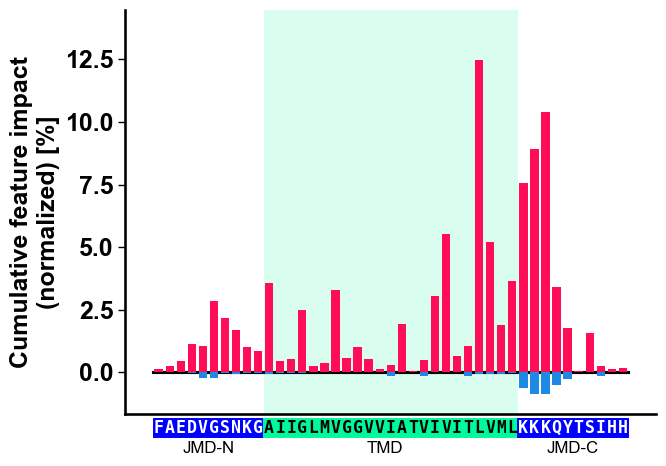

In [22]:
# Plot CPP-SHAP profile for selected protein
cpp_plot.profile(df_feat=df_feat, shap_plot=True, col_imp="feat_impact_Protein0", tmd_seq=tmd_seq, jmd_n_seq=jmd_n_seq, jmd_c_seq=jmd_c_seq)
plt.show()

We recommend adjusting ``ylim`` to ensure that 0 is centered in the middle of the y-axis:

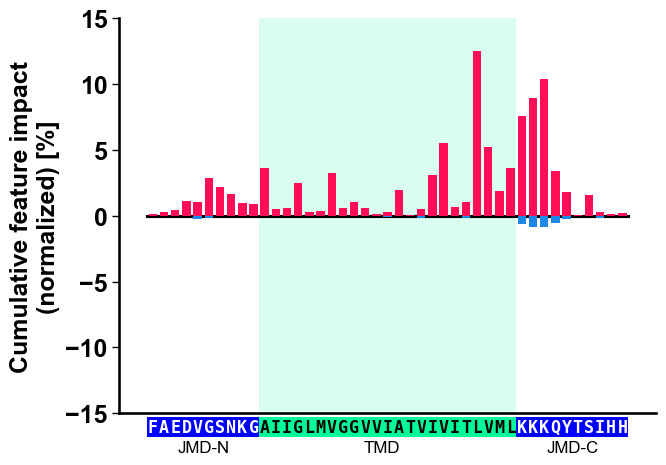

In [23]:
# Center y-axis
cpp_plot.profile(df_feat=df_feat, shap_plot=True, col_imp="feat_impact_Protein0", tmd_seq=tmd_seq, jmd_n_seq=jmd_n_seq, jmd_c_seq=jmd_c_seq, ylim=(-15, 15))
plt.show()